# Projet python diabete data analysis

## **Sommaire**:
**1. import element**

  creation dataframe: data

**2. data visualisation by variables**

**3. data cleaning**



**4. encoding**

  création dataframe data_weight (en gardant que les valeurs avec poids)

**5. training**

**6. prevision**

**7. prevision visualisation**

**8. conclusion**


## Import element

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:

#data=pd.read_csv('diabetic_data.csv')
data=pd.read_csv('diabetic_data.csv',na_filter=False)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [28]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


We can see that we have no missing value but instead, we have "?". We gonna replace them to be more lesible.

In [29]:
data.replace("?",pd.NA,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

We have some of variable with a lot of missing values: weight, payer_code and medical_speciality

*payer_code* : integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay.

*medical_speciality* : Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
We won't need theses categories for our analyse

*weight* seems to be important for an analiyse about the diabete so we won't delete it now but maybe analyse this after


In [30]:
data.drop(columns=['payer_code','medical_specialty'],inplace=True)
data = data.dropna(subset=['race','diag_1', 'diag_2', 'diag_3'])

# Data Analyse for each variable

##Predict value
####Readmitted
Days to inpatient readmission. Values: <30 if the patient was readmitted in less than 30 days, >30 if the patient was readmitted in more than 30 days, and No for no record of readmission.


<Axes: title={'center': 'proportion of the states of readmittation for the diabetic '}, ylabel='encounter_id'>

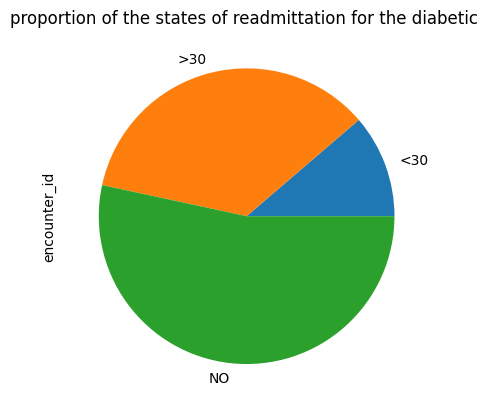

In [31]:
data.groupby(["readmitted"]).count()["encounter_id"].plot.pie(title="proportion of the states of readmittation for the diabetic ")

To simplify our analyse, we will gather >30 and <30 together in the category "YES". Our comparaison will just be if the patient has been readmitted our not.

<Axes: title={'center': 'proportion of the states of readmittation for the diabetic '}, ylabel='encounter_id'>

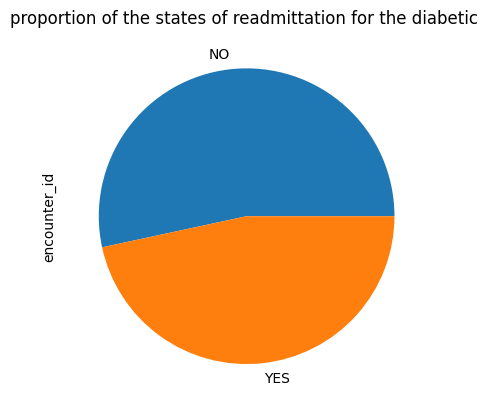

In [32]:
data['readmitted'] = data['readmitted'].replace({'>30': 'YES', '<30': 'YES'})
data.groupby(["readmitted"]).count()["encounter_id"].plot.pie(title="proportion of the states of readmittation for the diabetic ")

##Analyse of ID value
####encounter_id
Unique identifier of an encounter

Let's verify if the value is unique	:

In [33]:
print(len(data['encounter_id'].unique())==len(data['encounter_id']))
print(f"There are {len(data['encounter_id'].unique())} unique encounter in our dataset")

True
There are 98053 unique encounter in our dataset


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98053 entries, 1 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              98053 non-null  int64 
 1   patient_nbr               98053 non-null  int64 
 2   race                      98053 non-null  object
 3   gender                    98053 non-null  object
 4   age                       98053 non-null  object
 5   weight                    3036 non-null   object
 6   admission_type_id         98053 non-null  int64 
 7   discharge_disposition_id  98053 non-null  int64 
 8   admission_source_id       98053 non-null  int64 
 9   time_in_hospital          98053 non-null  int64 
 10  num_lab_procedures        98053 non-null  int64 
 11  num_procedures            98053 non-null  int64 
 12  num_medications           98053 non-null  int64 
 13  number_outpatient         98053 non-null  int64 
 14  number_emergency          

####patient_nbr
Unique identifier of a patient
Let's see what is the distribution of encounter by patient

Number of repetitions of encounter by patient
 patient_nbr
1     52350
2     10104
3      3230
4      1385
5       710
6       336
7       202
8       108
9        71
10       38
11       21
12       20
13       13
15        8
18        6
14        5
20        5
16        4
19        4
23        3
17        3
22        2
21        1
39        1
Name: count, dtype: int64


Text(0, 0.5, 'Number of patient(log scale)')

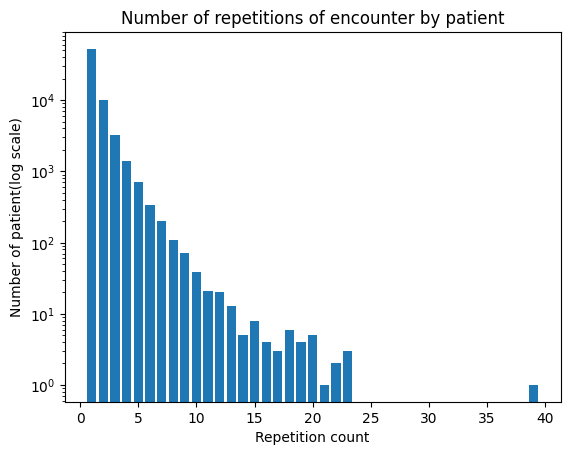

In [35]:
count_per_patient['patient_nbr'] =pd.DataFrame(data['patient_nbr'].value_counts())
frequency=count_per_patient['patient_nbr'].value_counts()
print("Number of repetitions of encounter by patient\n", frequency)
plt.bar(frequency.index, frequency.values)
plt.yscale('log')
plt.title('Number of repetitions of encounter by patient')
plt.xlabel('Repetition count')
plt.ylabel('Number of patient(log scale)')


We choose a log scale because the 2 first value were to high for the other.
We can see with this graphic that there was mostly one encounter by patient (50 000) or 10 000 patients with two encounters. We have the example of one patient with 39 encounter.

##Analyze of categorical value

####Race
Values: Caucasian, Asian, African American, Hispanic, and other

<Axes: title={'center': 'proportion diabetic by race'}, ylabel='encounter_id'>

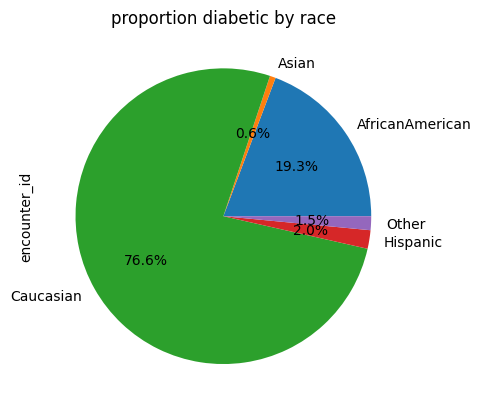

In [36]:
data.groupby(["race"]).count()["encounter_id"].plot.pie(autopct='%1.1f%%',title="proportion diabetic by race")

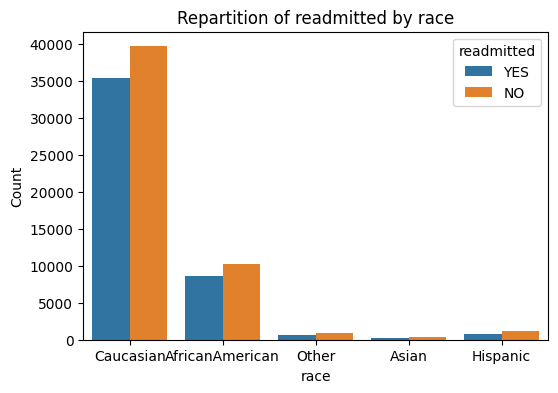

In [37]:
fig,ax= plt.subplots(figsize=(6,4))
sns.countplot(x="race", hue="readmitted", data=data)
plt.xlabel('race')
plt.ylabel('Count')
plt.title('Repartition of readmitted by race')
plt.show()

We have in our data a majority of caucasian in the population. The statues of readmitted by race is the same.
Let's continue the same analyse for each variable




####Gender

Values: male, female, and unknown/invalid

<Axes: title={'center': 'proportion diabetic by gender'}, ylabel='encounter_id'>

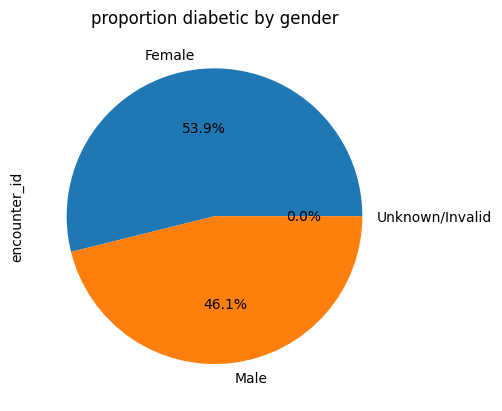

In [38]:
data.groupby(["gender"]).count()["encounter_id"].plot.pie(autopct='%1.1f%%',title="proportion diabetic by gender")

We have  more female with diabete than male. (54% vs 46%)








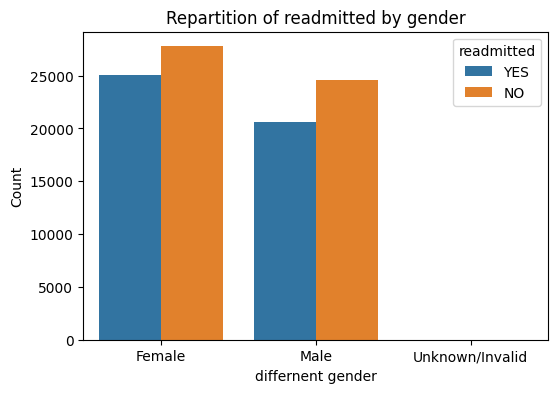

In [39]:
fig,ax= plt.subplots(figsize=(6,4))
sns.countplot(x="gender", hue="readmitted", data=data)
plt.xlabel('differnent gender')
plt.ylabel('Count')
plt.title('Repartition of readmitted by gender')
plt.show()

The repartition of readmitted by gender is almost equal. The male are less readmitted than the female

####Age
Grouped in 10-year intervals: [0, 10), [10, 20),..., [90, 100)

C:\Users\ringi_3xz04z7\AppData\Local\Temp\ipykernel_37320\1710031791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age', data=data, palette='viridis')


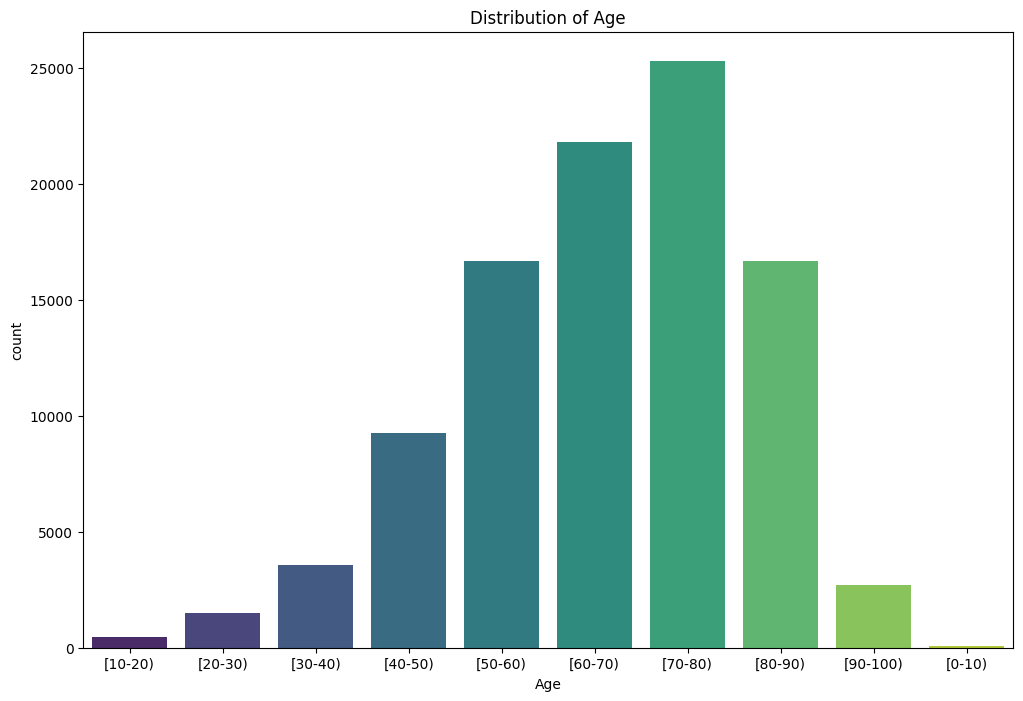

In [40]:
plt.figure(figsize=(12, 8))
sns.countplot(x='age', data=data, palette='viridis')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

We can see that most people have an encounter for diabete when they are between 70 and 80 years.

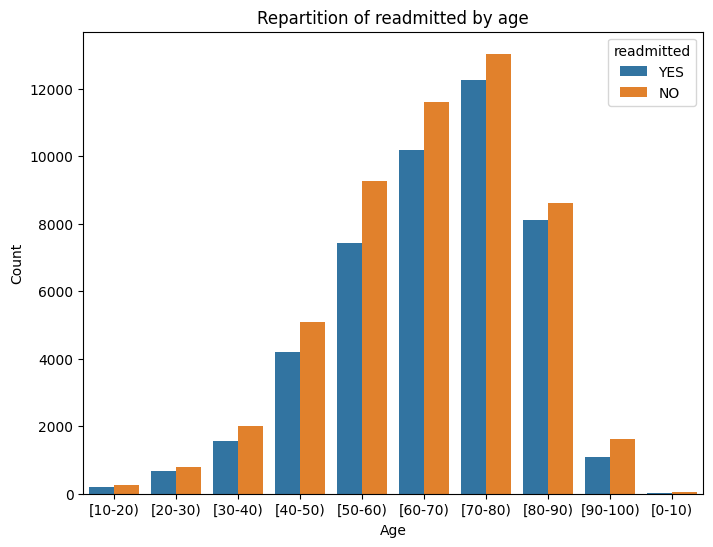

In [41]:
fig,ax= plt.subplots(figsize=(8,6))
sns.countplot(x="age", hue="readmitted", data=data)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Repartition of readmitted by age')
plt.show()

We can see that people are more  readmitted when they are young (0-30) or very old (70-100).

To analyse this with efficiency, we gonna transform the data to be in int format:

In [42]:
# We replace age intervals by their average, so [10-20] becomes 15, [30-40] becomes 35, etc

data['age'] = data['age'].str.extract(r'(\d+)-').astype(int)
data['age']=data['age']+5

##Weight (in pounds)


C:\Users\ringi_3xz04z7\AppData\Local\Temp\ipykernel_37320\2360761243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weight', data=data, palette='viridis')


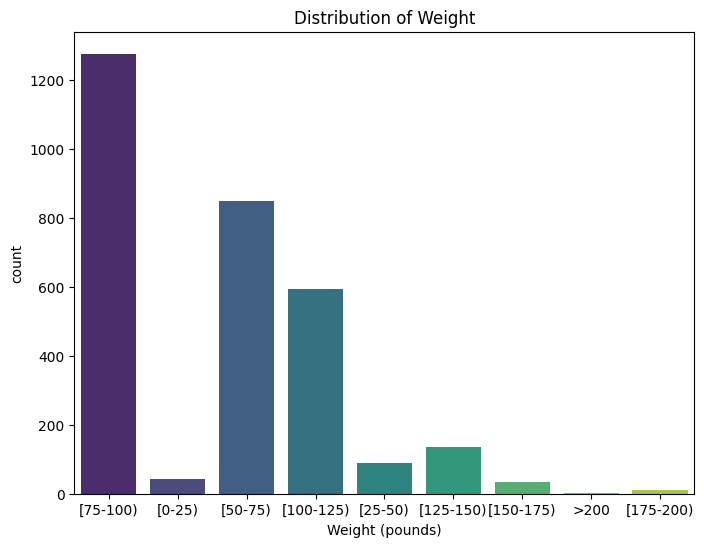

In [43]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='weight', data=data, palette='viridis')
plt.title('Distribution of Weight')
plt.xlabel('Weight (pounds)')
plt.show()

People are mostly between 75 and 100 pounds

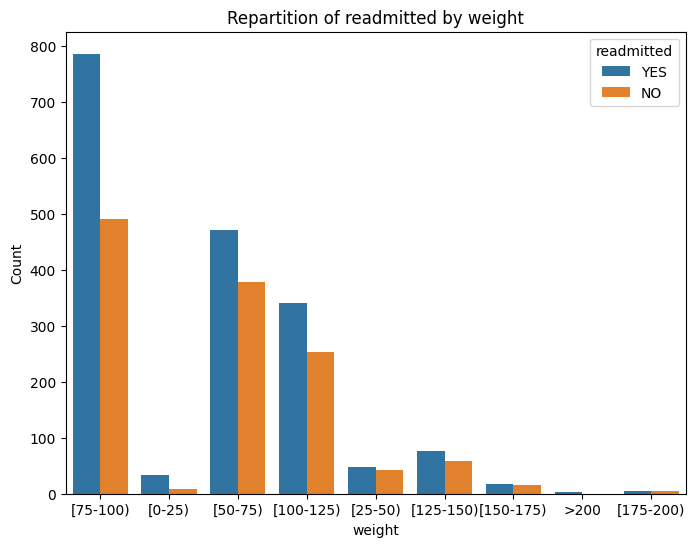

In [44]:
fig,ax= plt.subplots(figsize=(8,6))
sns.countplot(x="weight", hue="readmitted", data=data)
plt.xlabel('weight')
plt.ylabel('Count')
plt.title('Repartition of readmitted by weight')
plt.show()

In [45]:
# We replace weight intervals by their average, so [75-100] becomes 87.5 etc

data['weight'] = data['weight'].str.extract(r'(\d+)-').astype(float)
data['weight'] += 12.5
#conversion of the weight from pounds to kg
data['weight'] =data['weight']*0.45



C:\Users\ringi_3xz04z7\AppData\Local\Temp\ipykernel_37320\4152015372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weight', data=data, palette='viridis')


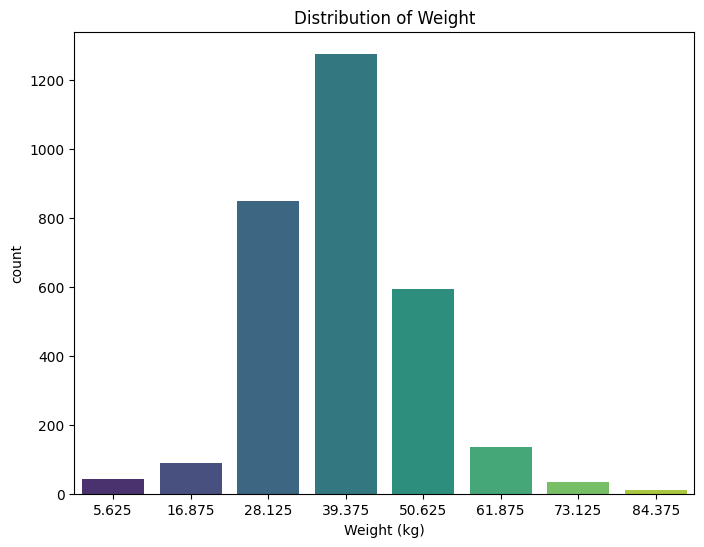

In [46]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='weight', data=data, palette='viridis')
plt.title('Distribution of Weight')
plt.xlabel('Weight (kg)')
plt.show()

We can see a big difference of the readmitted status with the weight. We know that there are just 3% of our data with an indicate weight. So we will have to choose if we keep this information or if we delete it because of the NA value in

##Mapping
####admission_type_id
####discharge_disposition_id
####admission_source_id

These columns are with id instead of there information.
We will do a mapping to have the good information.

In [47]:
mapping=pd.read_csv("IDS_mapping.csv",)
mapping.reset_index(drop=True,inplace=True)
type_admission,discharge,source_admission=mapping[:8],mapping[10:40],mapping[42:68]


In [48]:
admission_type_dict=dict(zip(mapping[:8].iloc[:, 0].astype(int), mapping[:8].iloc[:, 1]))
discharge_dict=dict(zip(mapping[10:40].iloc[:, 0].astype(int), mapping[10:40].iloc[:, 1]))
admission_source_dict=dict(zip(mapping[42:68].iloc[:, 0].astype(int), mapping[42:68].iloc[:, 1]))




In [49]:
data['admission_type_id']=data['admission_type_id'].map(admission_type_dict)
data['discharge_disposition_id']=data['discharge_disposition_id'].map(discharge_dict)
data['admission_source_id']=data['admission_source_id'].map(admission_source_dict)

Text(0.5, 1.0, 'Distribution by admission type')

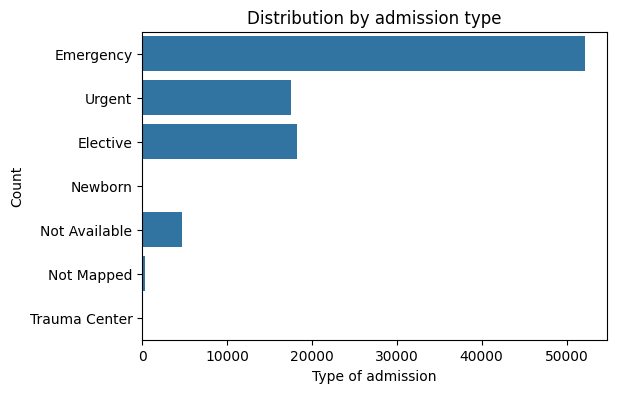

In [50]:
#data_label.groupby("admission_type_id")["encounter_id"].count().plot.barh(title="number of encounter by type of admission")
#by sns
fig,ax=plt.subplots(figsize=(6, 4))
ax=sns.countplot(y="admission_type_id",data=data)
plt.xlabel('Type of admission')
plt.ylabel('Count')
plt.title('Distribution by admission type')

Text(0.5, 1.0, 'Distribution by discharge disposition')

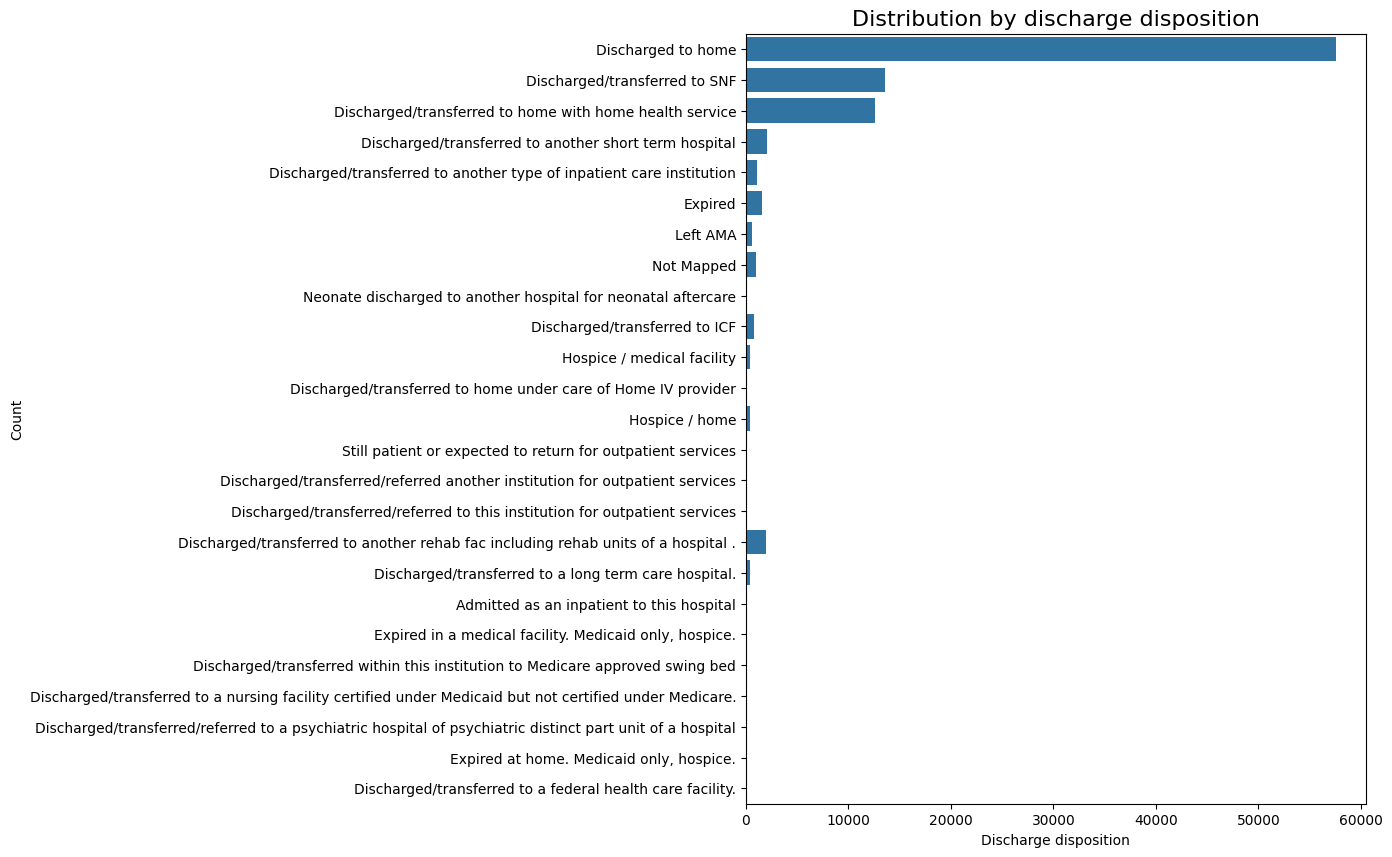

In [51]:
#data_label.groupby("discharge_disposition_id")["encounter_id"].count().plot.barh(title="number of encounter by disposition of discharge ")
fig,ax=plt.subplots(figsize=(8, 10))
ax=sns.countplot(y="discharge_disposition_id",data=data)
plt.xlabel('Discharge disposition')
plt.ylabel('Count')
plt.title('Distribution by discharge disposition',size=16)

Text(0.5, 1.0, 'Distribution by source of admission')

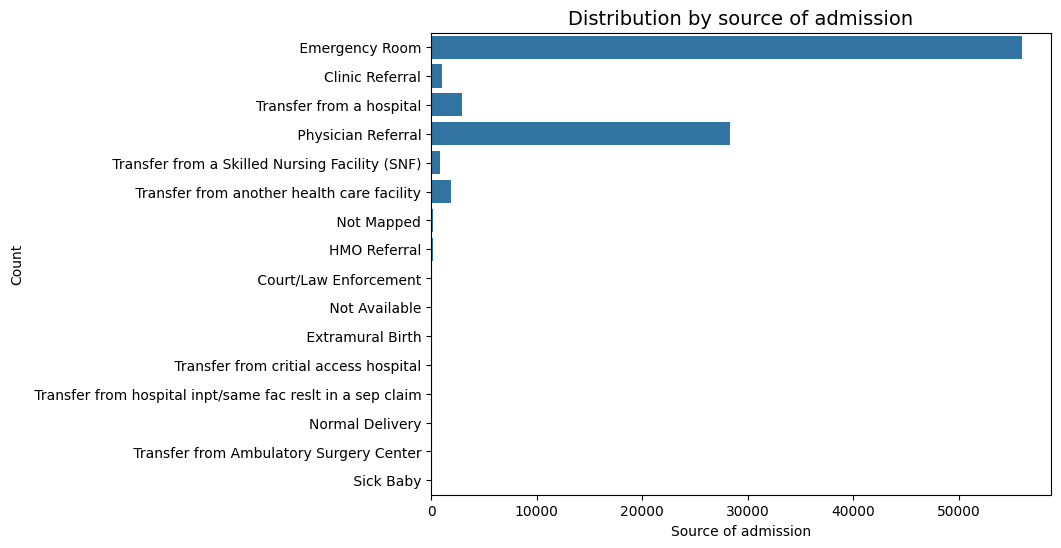

In [52]:
#data_label.groupby("admission_source_id")["encounter_id"].count().plot.barh(title="number of encounter by source of admission")
fig,ax=plt.subplots(figsize=(8, 6))
ax=sns.countplot(y="admission_source_id",data=data)
plt.xlabel('Source of admission')
plt.ylabel('Count')
plt.title('Distribution by source of admission',size=14)

###Mapping diagnostic
####Diag_1   Diag_2    Diag_3
The primary (second and third) diagnosis (coded as first three digits of ICD9); 848 distinct values

In [53]:
[len(data['diag_1'].unique()),len(data['diag_2'].unique()),len(data['diag_3'].unique())]

[713, 740, 786]

We have a lot of categories in our dataset for each ICD9

In [54]:
print(data["diag_1"].value_counts()[:10]/len(data["diag_1"].unique()))

diag_1
428    9.438990
414    8.939691
786    5.469846
410    4.928471
486    4.785414
427    3.788219
491    3.099579
715    2.907433
434    2.781206
780    2.771388
Name: count, dtype: float64


The 2 ICD9 most important are 428 with 10% (heart failure), the 414 with 9% (Coronary atherosclerosis).
To simplify our analyse, we gonna group these 848 category in main category find on internet with a mapping.


In [55]:
def replace_values(value):
    try:
        value = float(value)
        if value <= 139:
            return "Infectious and Parasitic Diseases"
        elif value <= 239:
            return "Neoplasms"
        elif value <= 279:
            return "Endocrine, Nutritional, and Metabolic Disorders and Immunity Disorders"
        elif value <= 289:
            return "Diseases of the Blood and Blood-Forming Organs"
        elif value <= 319:
            return "Mental Disorders"
        elif value <= 389:
            return "Diseases of the Nervous System and Sense Organs"
        elif value <= 459:
            return "Diseases of the Circulatory System"
        elif value <= 519:
            return "Diseases of the Respiratory System"
        elif value <= 579:
            return "Diseases of the Digestive System"
        elif value <= 629:
            return "Diseases of the Genitourinary System"
        elif value <= 679:
            return "Complications of Pregnancy, Childbirth, and the Puerperium"
        elif value <= 709:
            return "Diseases of the Skin and Subcutaneous Tissue"
        elif value <= 739:
            return "Diseases of the Musculoskeletal System and Connective Tissue"
        elif value <= 759:
            return "Congenital Anomalies"
        elif value <= 779:
            return "Certain Conditions Originating in the Perinatal Period"
        elif value <= 799:
            return "Symptoms, Signs, and Ill-Defined Conditions"
        elif value <= 999:
            return "Injuries and Poisonings"
        else:
            return "Error"
    except ValueError:
        if "E" in value:
            return "External Causes of Injury and Poisoning"
        elif "V" in value:
            return "Factors Influencing Health Status and Contact with Health Services"
        elif "M" in value:
            return "Morphology of Neoplasms"

data['diag_1'] = data['diag_1'].apply(replace_values)
data['diag_2'] = data['diag_2'].apply(replace_values)
data['diag_3'] = data['diag_3'].apply(replace_values)

Text(0.5, 1.0, 'Distribution by type of 1st diagnostic')

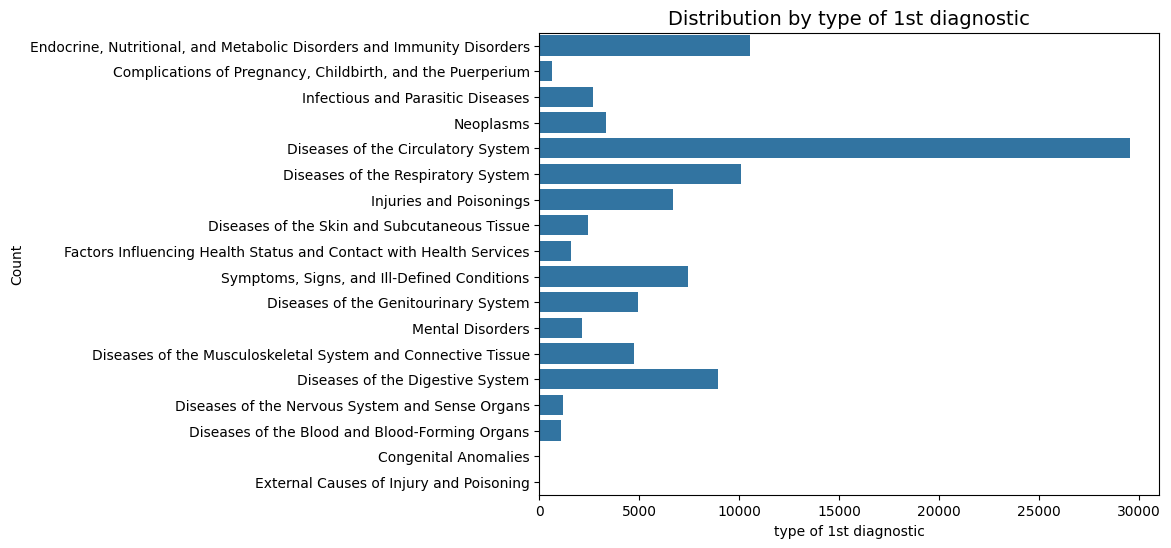

In [56]:
#data_label.groupby("diag_1")["encounter_id"].count().plot.barh(title="number of encounter by type of 1st diagnosis")
fig,ax=plt.subplots(figsize=(8, 6))
ax=sns.countplot(y="diag_1",data=data)
plt.xlabel('type of 1st diagnostic')
plt.ylabel('Count')
plt.title('Distribution by type of 1st diagnostic',size=14)
#same for diag_2 and diag_3

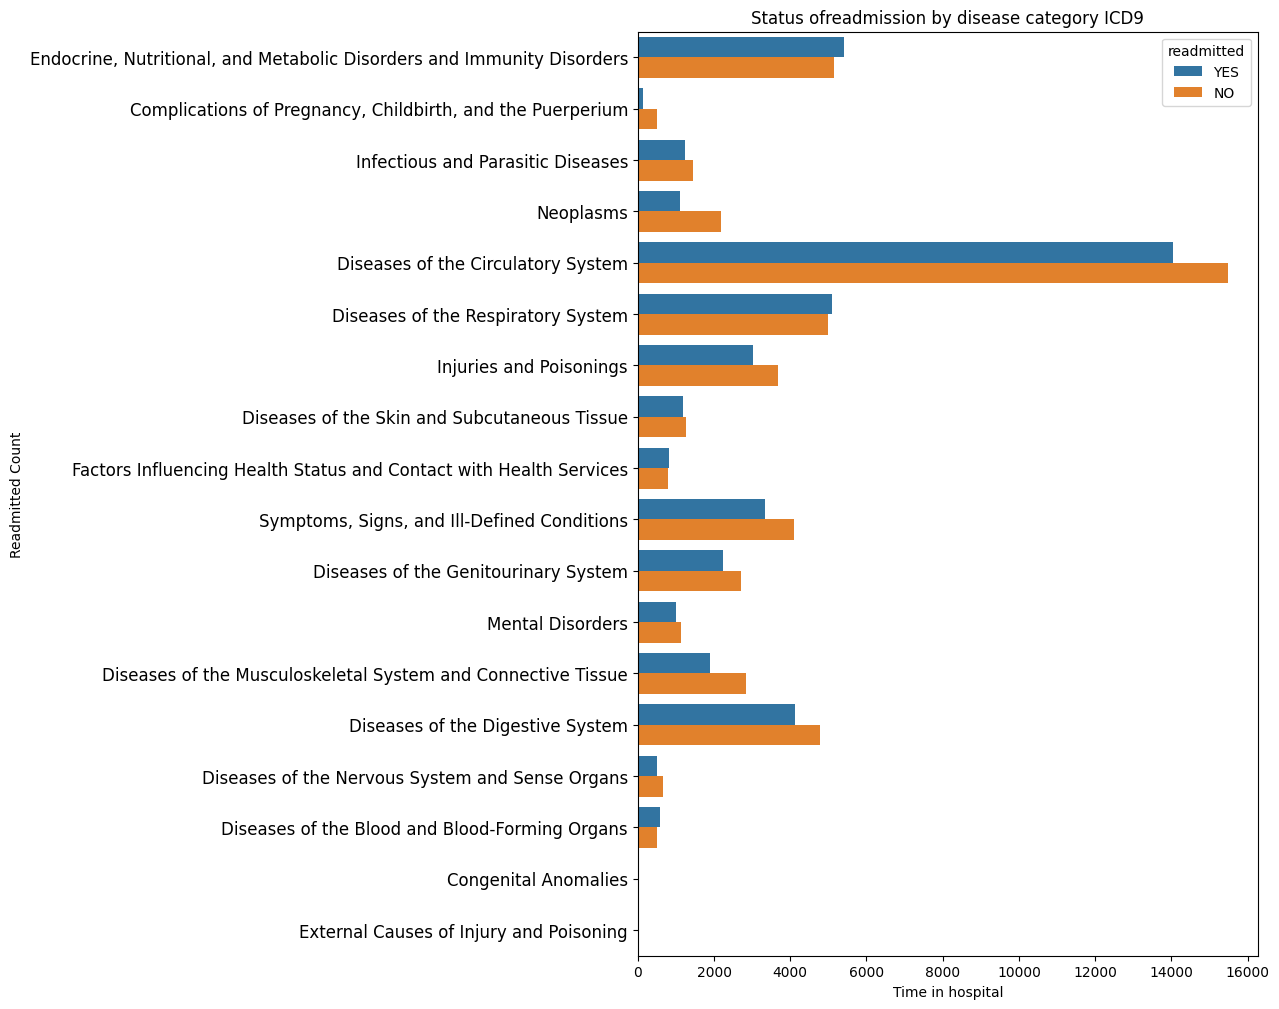

In [57]:
fig, ax = plt.subplots(figsize=(8, 12))

ax=sns.countplot(y='diag_1',hue="readmitted",data=data)
plt.xlabel('Time in hospital')
plt.yticks(size = 12)
plt.ylabel('Readmitted Count')
plt.title('Status ofreadmission by disease category ICD9' )
plt.show()

It's the same with the others diagnostics

##Analyse of numerical value



####time_in_hospital
Integer number of days between admission and discharge

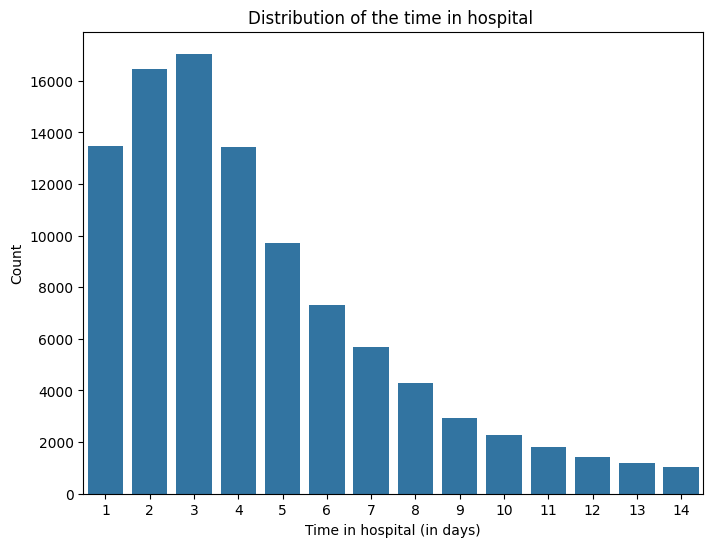

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(x=data['time_in_hospital'].astype(int))
plt.xlabel('Time in hospital (in days)')
plt.ylabel('Count')
plt.title('Distribution of the time in hospital ' )
plt.show()

####Num_lab_procedures:
Number of lab tests performed during the encounter

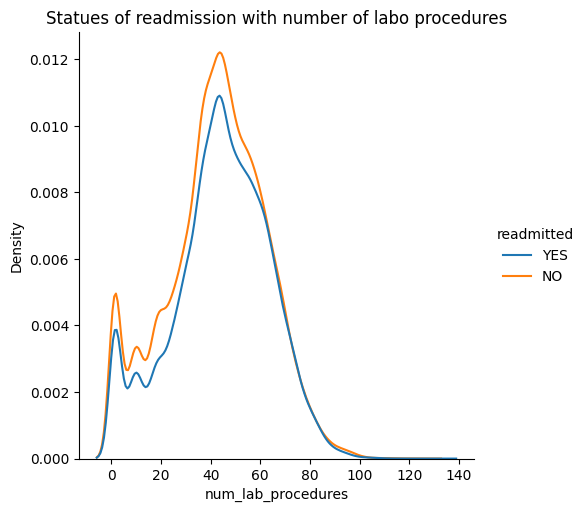

In [59]:
sns.displot(data, x="num_lab_procedures", hue= 'readmitted', kind="kde")
plt.title('Statues of readmission with number of labo procedures')
plt.show()

####num_procedures
Number of procedures (other than lab tests) performed during the encounter

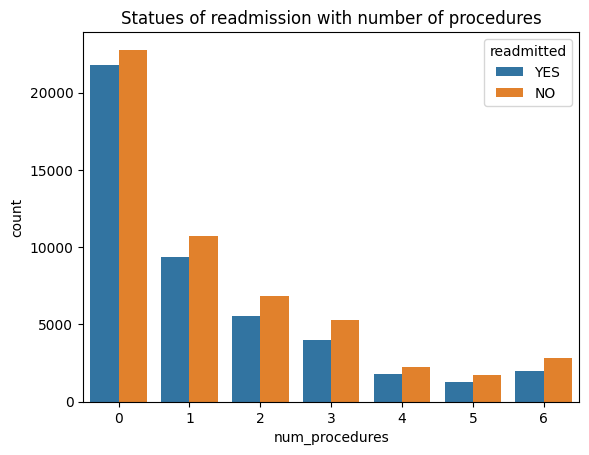

In [60]:
sns.countplot(data, x="num_procedures", hue= 'readmitted')
plt.title('Statues of readmission with number of procedures')
plt.show()

####num_medications
Number of distinct generic names administered during the encounter

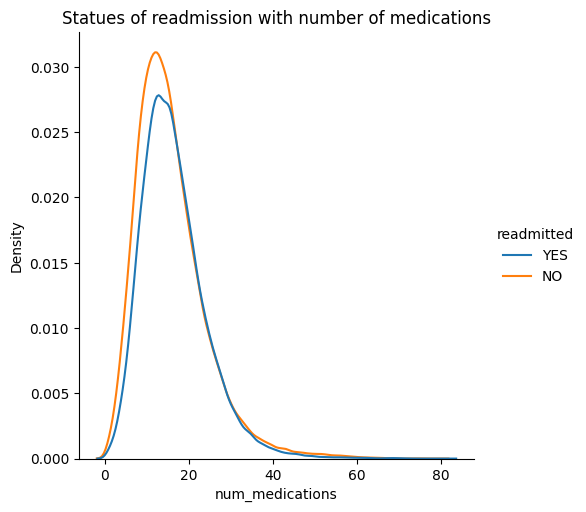

In [61]:
sns.displot(data, x="num_medications", hue= 'readmitted', kind="kde")
plt.title('Statues of readmission with number of medications')
plt.show()

####number_outpatient
Number of outpatient visits of the patient in the year preceding the encounter

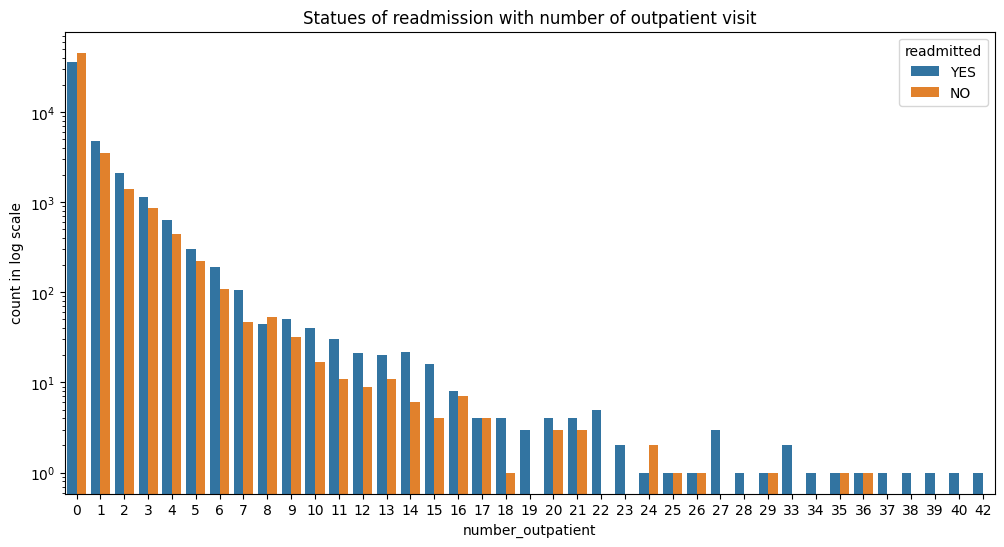

In [62]:
fig,ax=plt.subplots(figsize=(12, 6))
sns.countplot(data, x="number_outpatient", hue= 'readmitted')
plt.ylabel('count in log scale')
plt.title('Statues of readmission with number of outpatient visit')
plt.yscale('log')
plt.show()


####number_emergency
Number of emergency visits of the patient in the year preceding the encounter

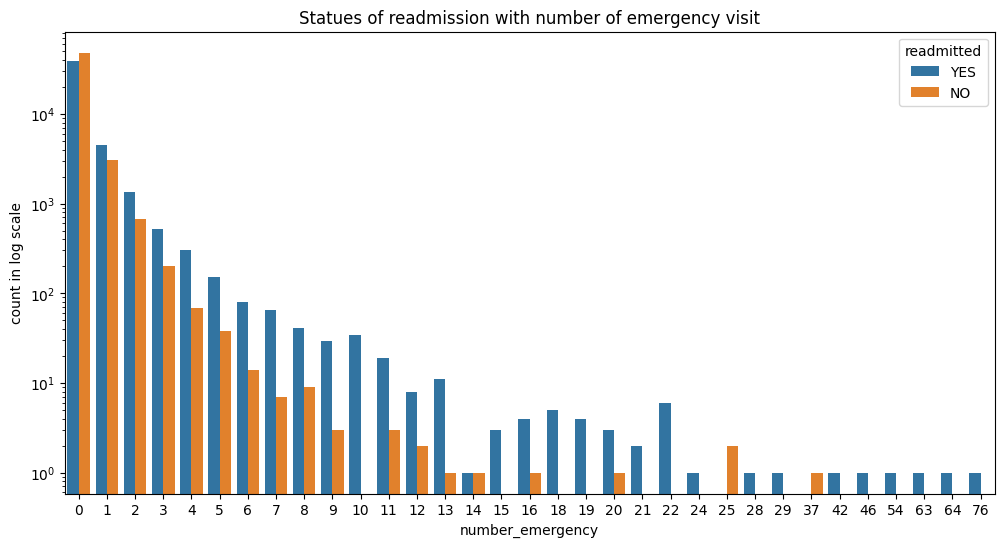

In [63]:
fig,ax=plt.subplots(figsize=(12, 6))
sns.countplot(data, x="number_emergency", hue= 'readmitted')
plt.ylabel('count in log scale')
plt.title('Statues of readmission with number of emergency visit')
plt.yscale('log')
plt.show()


####Number_inpatient
Number of inpatient visits of the patient in the year preceding the encounter

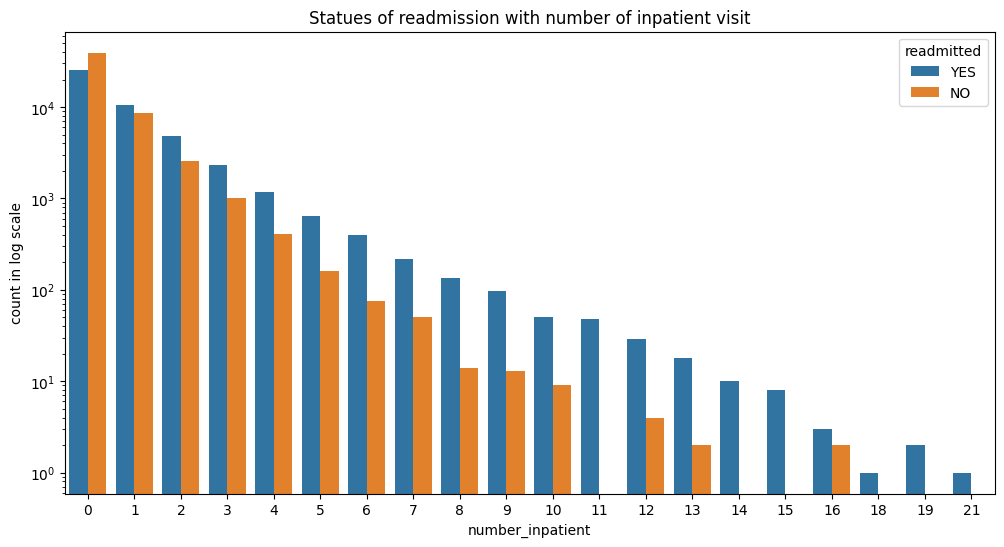

In [64]:
fig,ax=plt.subplots(figsize=(12, 6))
sns.countplot(data, x="number_inpatient", hue= 'readmitted')
plt.ylabel('count in log scale')
plt.title('Statues of readmission with number of inpatient visit')
plt.yscale('log')
plt.show()

####number_diagnoses
Number of diagnoses entered to the system

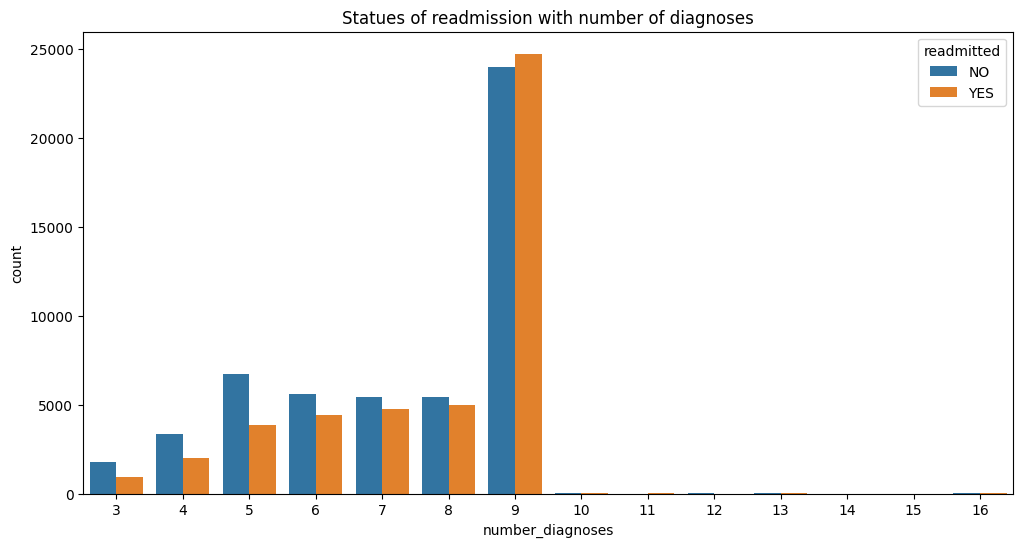

In [65]:
fig,ax=plt.subplots(figsize=(12, 6))
sns.countplot(data, x="number_diagnoses", hue= 'readmitted')
plt.ylabel('count')
plt.title('Statues of readmission with number of diagnoses')
plt.show()

####max_glu_serum
Indicates the range of the result or if the test was not taken. Values: >200, >300, normal, and none if not measured

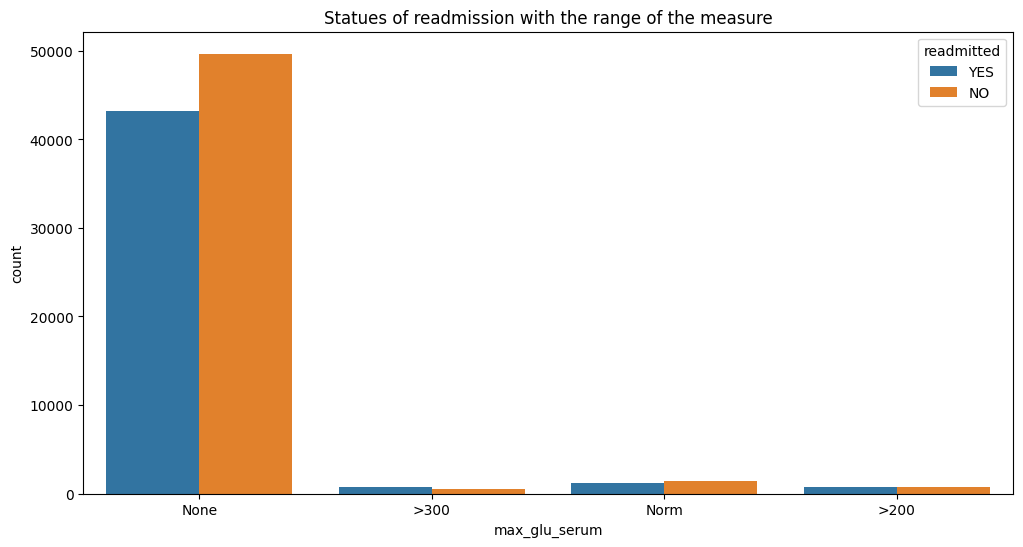

In [66]:
fig,ax=plt.subplots(figsize=(12, 6))
sns.countplot(data, x="max_glu_serum", hue= 'readmitted')
plt.ylabel('count')
plt.title('Statues of readmission with the range of the measure')
plt.show()

Let's see the graphic without the none values

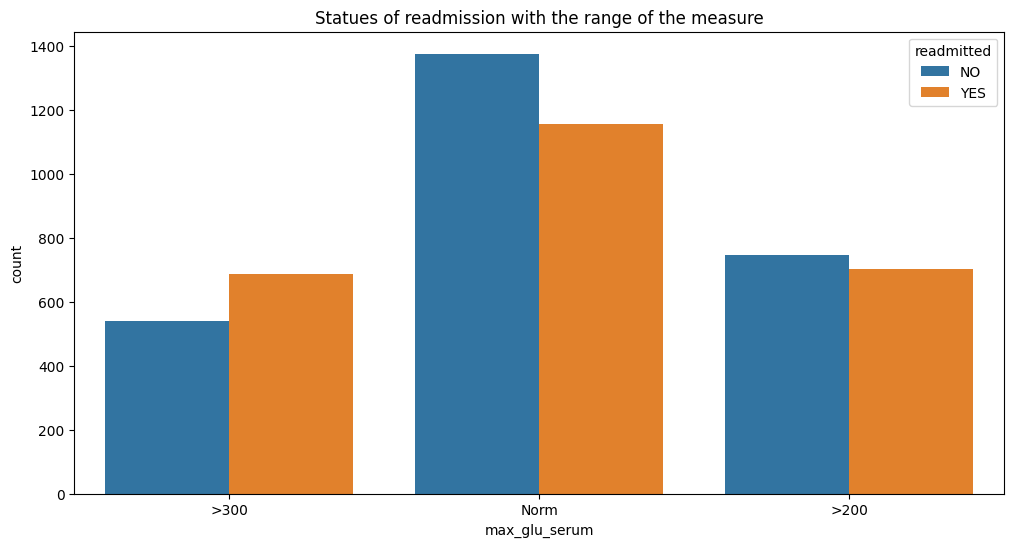

In [67]:
fig,ax=plt.subplots(figsize=(12, 6))
sns.countplot(data[data['max_glu_serum']!='None'], x="max_glu_serum", hue= 'readmitted')
plt.ylabel('count')
plt.title('Statues of readmission with the range of the measure')
plt.show()

We can see that there are more more readmission with >300 than the others

####A1Cresult
Indicates the range of the result or if the test was not taken. Values: >8 if the result was greater than 8%, >7 if the result was greater than 7% but less than 8%, normal if the result was less than 7%, and none if not measured.

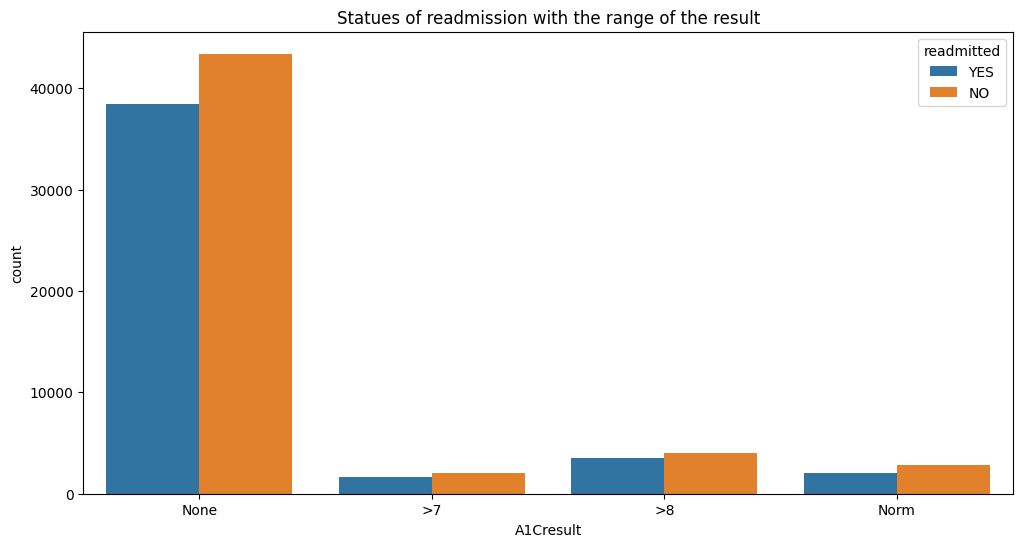

In [68]:
fig,ax=plt.subplots(figsize=(12, 6))
sns.countplot(data, x="A1Cresult", hue= 'readmitted')
plt.ylabel('count')
plt.title('Statues of readmission with the range of the result')
plt.show()

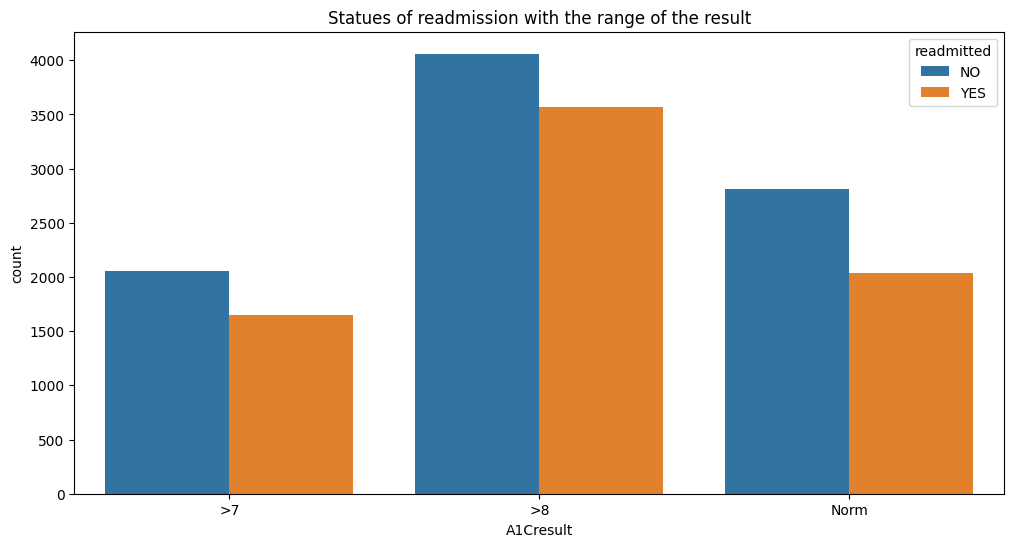

In [69]:
fig,ax=plt.subplots(figsize=(12, 6))
sns.countplot(data[data['A1Cresult']!='None'], x="A1Cresult", hue= 'readmitted')
plt.ylabel('count')
plt.title('Statues of readmission with the range of the result')
plt.show()

##Generic names of medications (24 columns)

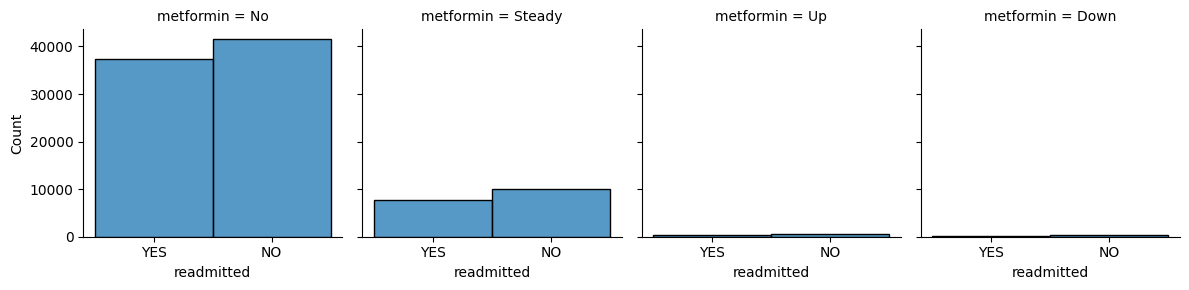

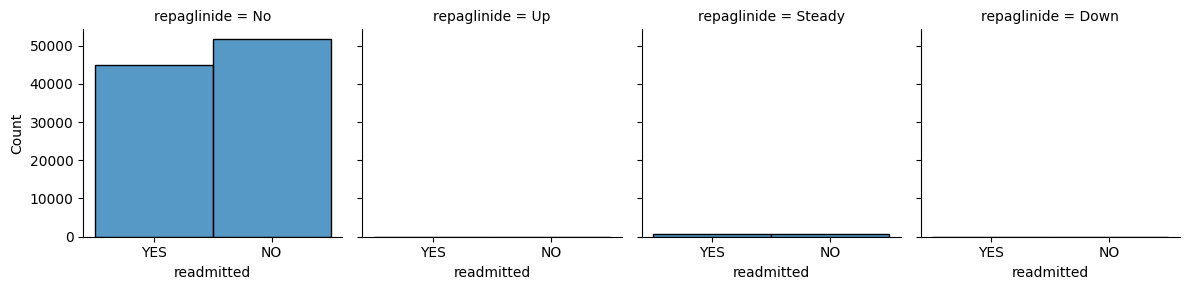

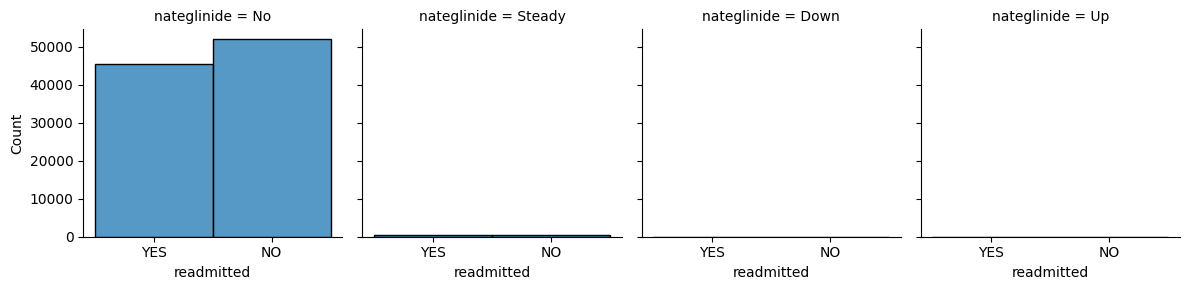

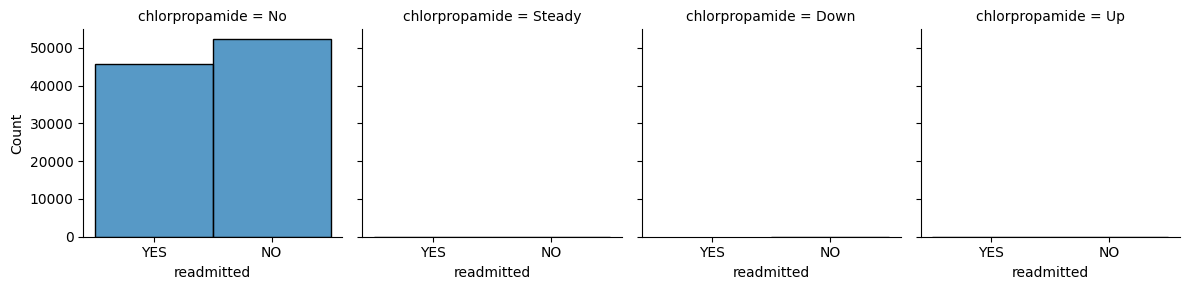

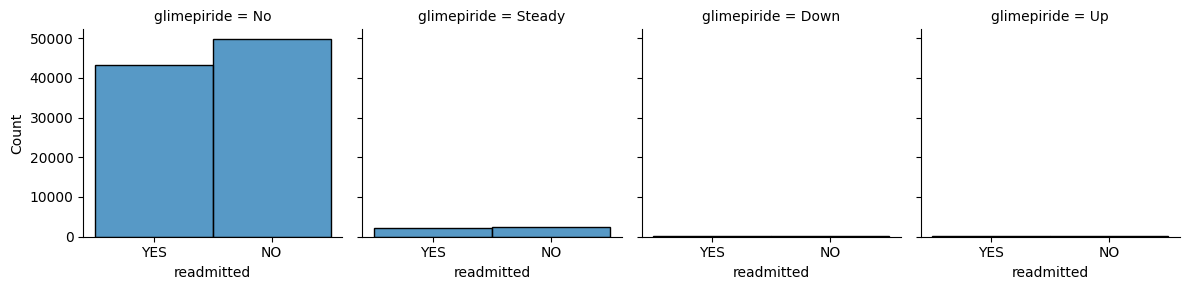

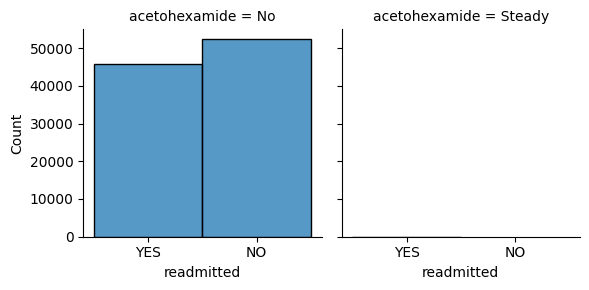

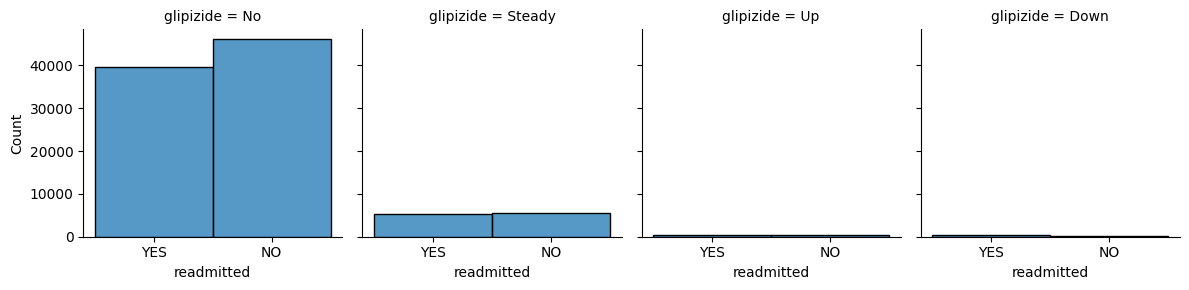

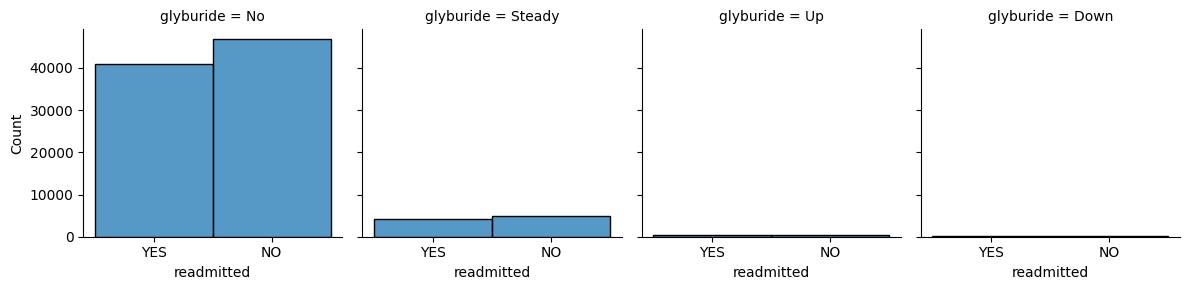

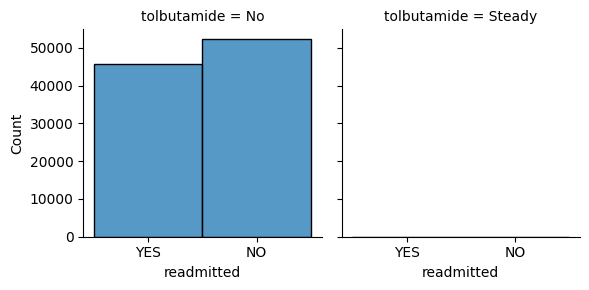

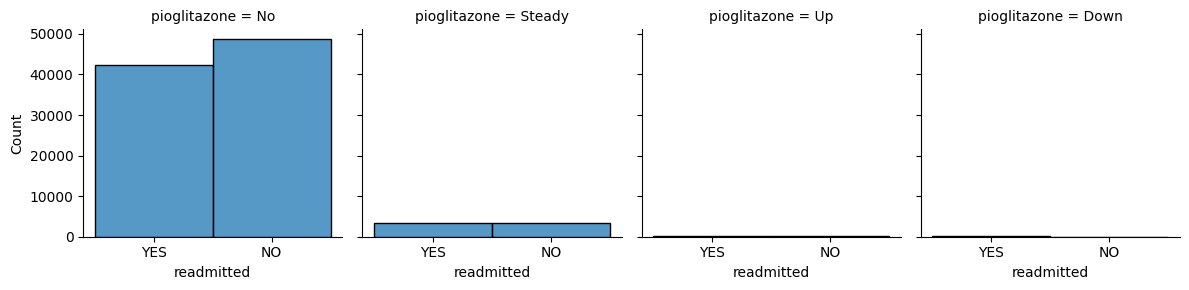

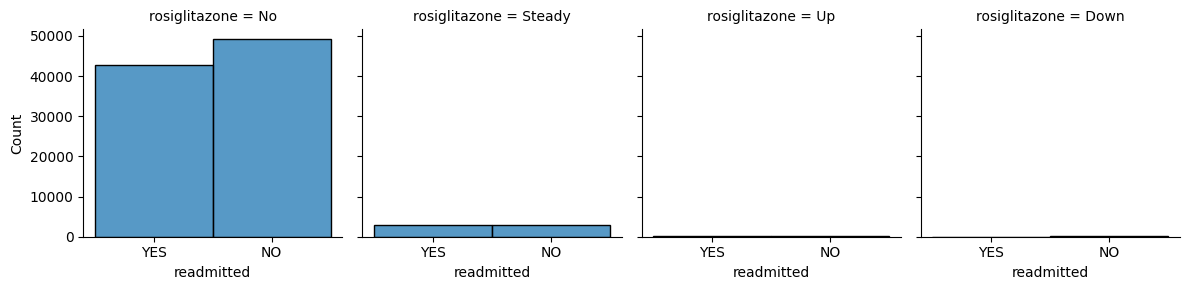

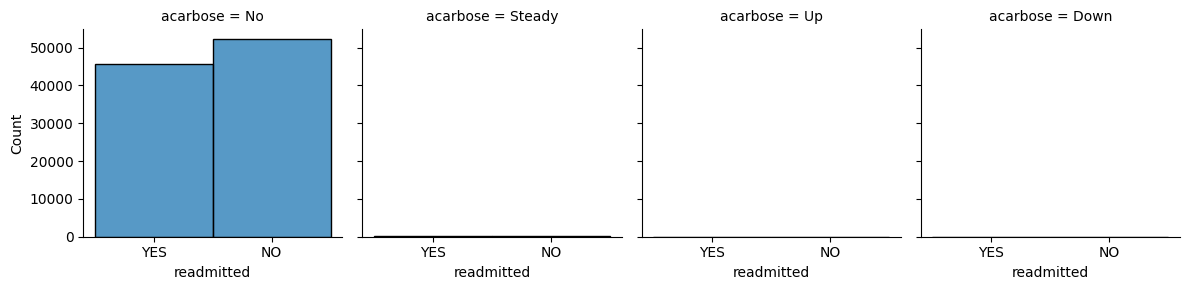

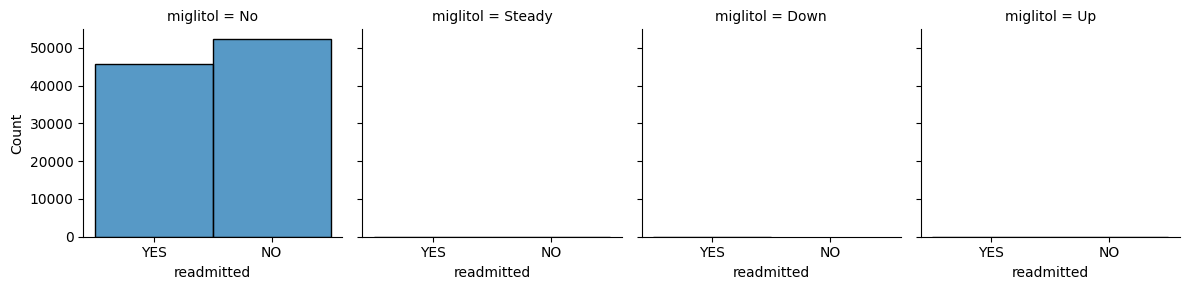

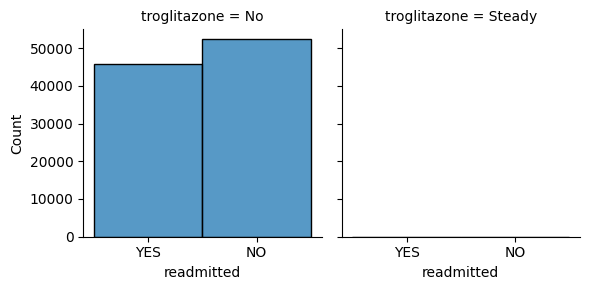

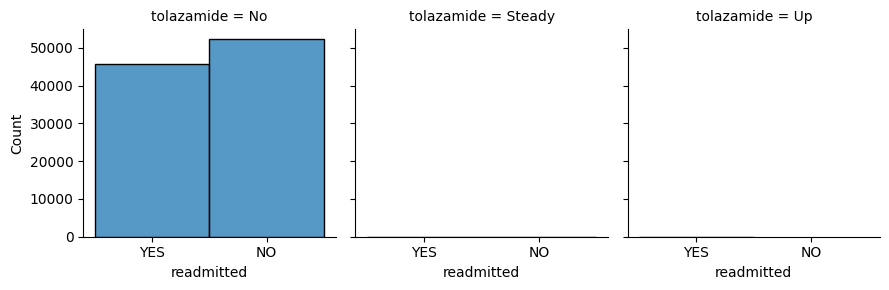

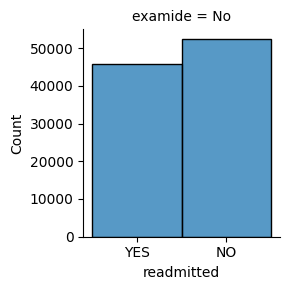

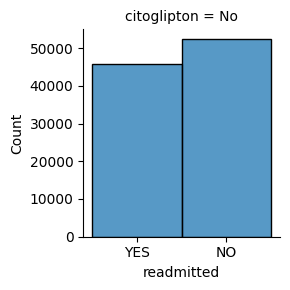

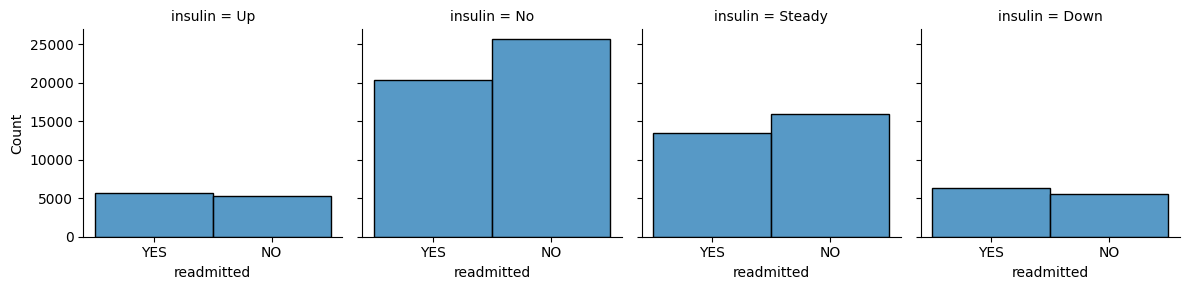

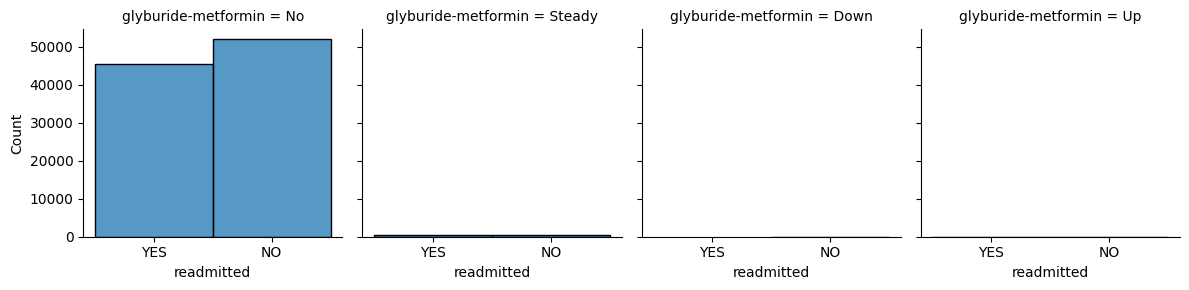

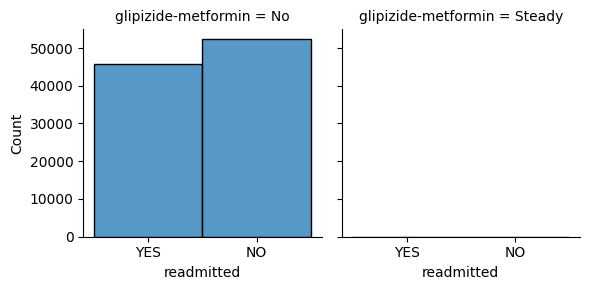

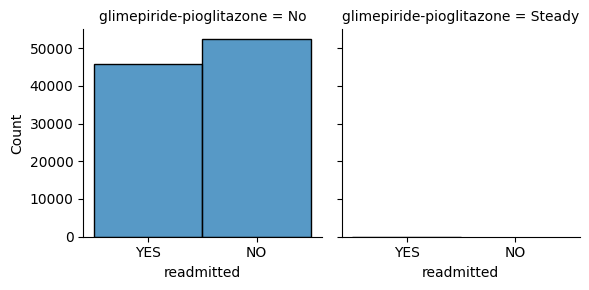

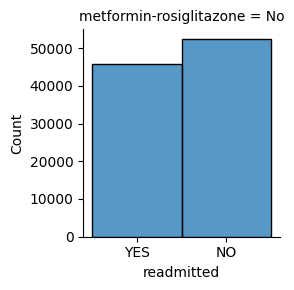

In [70]:
for columnName in data.iloc[:, 22:44].columns:
    g = sns.FacetGrid(data, col=columnName)
    g.map(sns.histplot, "readmitted")
    plt.show()

## Data pre-processing
Handling missing values

Encoding

In [71]:
#We replace the No with 0 and Yes with 1
data=data.replace({'No': 0, 'Yes': 1, 'Ch':1, 'Down': 1, 'Steady': 2, 'Up':3})

In [72]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [73]:
#We use ordinal encoder for these 3 columns because there is a hierarchy between its values
#encoding max_glu_serum
max_glu_serum_order = ['None', 'Norm', '>200', '>300']
data['max_glu_serum'] = pd.Categorical(data['max_glu_serum'], categories=max_glu_serum_order, ordered=True)
data = data.sort_values(by='max_glu_serum',ascending=True)
ordinal_encoder = OrdinalEncoder(categories=[max_glu_serum_order])
data['max_glu_serum'] = ordinal_encoder.fit_transform(data[['max_glu_serum']])

#encoding A1Cresult
A1Cresult_order = ['None', 'Norm', '>7', '>8']
data['A1Cresult'] = pd.Categorical(data['A1Cresult'], categories=A1Cresult_order, ordered=True)
data = data.sort_values(by='A1Cresult',ascending=True)
ordinal_encoder = OrdinalEncoder(categories=[A1Cresult_order])
data['A1Cresult'] = ordinal_encoder.fit_transform(data[['A1Cresult']])

#encoding readmitted
readmitted_order = ['NO', 'YES']
data['readmitted'] = pd.Categorical(data['readmitted'], categories=readmitted_order, ordered=True)
data = data.sort_values(by='readmitted',ascending=True)
ordinal_encoder = OrdinalEncoder(categories=[readmitted_order])
data['readmitted'] = ordinal_encoder.fit_transform(data[['readmitted']])

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98053 entries, 56897 to 330
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   encounter_id              98053 non-null  int64  
 1   patient_nbr               98053 non-null  int64  
 2   race                      98053 non-null  object 
 3   gender                    98053 non-null  object 
 4   age                       98053 non-null  int32  
 5   weight                    3033 non-null   float64
 6   admission_type_id         92918 non-null  object 
 7   discharge_disposition_id  94429 non-null  object 
 8   admission_source_id       91451 non-null  object 
 9   time_in_hospital          98053 non-null  int64  
 10  num_lab_procedures        98053 non-null  int64  
 11  num_procedures            98053 non-null  int64  
 12  num_medications           98053 non-null  int64  
 13  number_outpatient         98053 non-null  int64  
 14  number_em

Encoding

In [75]:
from sklearn.preprocessing import OneHotEncoder

In [76]:
#We use OneHot encoding for these columns because there is a lot of different values and there is no hierarchy

# Columns to encode
diagnosis_columns = ['admission_type_id','discharge_disposition_id','admission_source_id','race','gender','diag_1', 'diag_2', 'diag_3']

onehot_encoder = OneHotEncoder(sparse=False, drop='first')

# Loop through each diagnosis column
for column in diagnosis_columns:
    # Fit and transform the diagnosis column
    diagnosis_encoded = onehot_encoder.fit_transform(data[[column]])

    # Create a DataFrame with the encoded columns
    encoded_df = pd.DataFrame(diagnosis_encoded, columns=onehot_encoder.get_feature_names_out([column]))

    # Reset the index of the original data
    data.reset_index(drop=True, inplace=True)

    # Concatenate the original data with the encoded columns
    data = pd.concat([data, encoded_df], axis=1)

# Drop the original diagnosis columns
data = data.drop(diagnosis_columns, axis=1)

c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\

In [77]:
data_weight = data.dropna()
data_weight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3033 entries, 57 to 98009
Columns: 145 entries, encounter_id to diag_3_Symptoms, Signs, and Ill-Defined Conditions
dtypes: float64(109), int32(1), int64(35)
memory usage: 3.4 MB


In [78]:
data.drop(columns=["weight"],inplace=True)
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98053 entries, 0 to 98052
Columns: 144 entries, encounter_id to diag_3_Symptoms, Signs, and Ill-Defined Conditions
dtypes: float64(108), int32(1), int64(35)
memory usage: 107.4 MB


## Train test

We are going to test 5 classification algorithms to predict the column Readmitted :
- SVC (Support Vector Machine)
- LR (Logistic Regression)
- RF (Random Forest classifier)
- XGB (XGBoostClassifier)
- NB (Naive Bayes classifier)

We will use train test on two df :
- data_weight (3033 instances, contains the weight column)
- data_sample (10000 instances, doesn't contain the weight column)

We will compare the accuracies of the algorithms

In [79]:
# create a sample with 10k instances
data_sample=data.sample(n=10000, random_state=42)

data_weight.info()
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3033 entries, 57 to 98009
Columns: 145 entries, encounter_id to diag_3_Symptoms, Signs, and Ill-Defined Conditions
dtypes: float64(109), int32(1), int64(35)
memory usage: 3.4 MB
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 68448 to 17526
Columns: 144 entries, encounter_id to diag_3_Symptoms, Signs, and Ill-Defined Conditions
dtypes: float64(108), int32(1), int64(35)
memory usage: 11.0 MB


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.naive_bayes import GaussianNB


## Train test sur data_weight

In [81]:
# train test split on data_weight
X = data_weight.drop('readmitted', axis=1)
y = data_weight['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
#SVC
svc_model = SVC(kernel='linear')

#Train the model on the training data
svc_model.fit(X_train, y_train)

#Make predictions on the testing data
svc_pred = svc_model.predict(X_test)

#Evaluate the model
SVC_w_accuracy = accuracy_score(y_test, svc_pred)
print(f"Accuracy: {SVC_w_accuracy:.2f}")

Accuracy: 0.66


In [83]:
#LR
lr_model = LogisticRegression()

#Train the model on the training data
lr_model.fit(X_train, y_train)

#Make predictions on the testing data
lr_pred = lr_model.predict(X_test)

#Evaluate the model
LR_w_accuracy = accuracy_score(y_test, lr_pred)
print(f"Accuracy: {LR_w_accuracy:.2f}")

Accuracy: 0.66


In [84]:
#RF
rf_model = RandomForestClassifier(n_estimators = 450, max_depth=9, random_state=43)

#Train the model on the training data
rf_model.fit(X_train, y_train)

#Make predictions on the testing data
rf_pred = rf_model.predict(X_test)

#Evaluate the model
RF_w_accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {RF_w_accuracy:.2f}")

Accuracy: 0.68


In [85]:
#XGB
xgb_model = xgboost.XGBClassifier()

#Train the model on the training data
xgb_model.fit(X_train, y_train)

#Make predictions on the testing data
xgb_pred = xgb_model.predict(X_test)

#Evaluate the model
XGB_w_accuracy = accuracy_score(y_test, xgb_pred)
print(f"Accuracy: {XGB_w_accuracy:.2f}")

Accuracy: 0.65


In [86]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()

#Train the model on the training data
naive_bayes_model.fit(X_train,y_train)

# Make predictions on the testing data
nb_pred = naive_bayes_model.predict(X_test)

# Evaluate the model
NB_w_accuracy = accuracy_score(y_test, nb_pred)
print(f"Accuracy: {NB_w_accuracy:.2f}")

Accuracy: 0.45


## Train test on data_sample

In [87]:
# train test sur data_weight
X = data_sample.drop('readmitted', axis=1)
y = data_sample['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
#SVC
svc_model = SVC(kernel='linear')

#Train the model on the training data
svc_model.fit(X_train, y_train)

#Make predictions on the testing data
svc_pred = svc_model.predict(X_test)

#Evaluate the model
SVC_s_accuracy = accuracy_score(y_test, svc_pred)
print(f"Accuracy: {SVC_s_accuracy:.2f}")

Accuracy: 0.64


In [89]:
#LR
lr_model = LogisticRegression()

#Train the model on the training data
lr_model.fit(X_train, y_train)

#Make predictions on the testing data
lr_pred = lr_model.predict(X_test)

#Evaluate the model
LR_s_accuracy = accuracy_score(y_test, lr_pred)
print(f"Accuracy: {LR_s_accuracy:.2f}")

Accuracy: 0.64


In [90]:
#RF
rf_model = RandomForestClassifier(n_estimators = 450, max_depth=9, random_state=43)

#Train the model on the training data
rf_model.fit(X_train, y_train)

#Make predictions on the testing data
rf_pred = rf_model.predict(X_test)

#Evaluate the model
RF_s_accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {RF_s_accuracy:.2f}")

Accuracy: 0.65


In [91]:
#XGB
xgb_model = xgboost.XGBClassifier()

#Train the model on the training data
xgb_model.fit(X_train, y_train)

#Make predictions on the testing data
xgb_pred = xgb_model.predict(X_test)

#Evaluate the model
XGB_s_accuracy = accuracy_score(y_test, xgb_pred)
print(f"Accuracy: {XGB_s_accuracy:.2f}")

Accuracy: 0.63


In [92]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()

#Train the model on the training data
naive_bayes_model.fit(X_train,y_train)

# Make predictions on the testing data
nb_pred = naive_bayes_model.predict(X_test)

# Evaluate the model
NB_s_accuracy = accuracy_score(y_test, nb_pred)
print(f"Accuracy: {NB_s_accuracy:.2f}")

Accuracy: 0.50


## Comparaison

In [93]:
#We create a df with the accuracies to visualize them using plots
dfs=['data_weight','data_sample']
cols=['SVC','LR','RF','XGB','NB']

df_acc = pd.DataFrame(index=dfs,columns=cols)
df_acc.loc['data_weight']=[SVC_w_accuracy,LR_w_accuracy,RF_w_accuracy,XGB_w_accuracy,NB_w_accuracy]
df_acc.loc['data_sample']=[SVC_s_accuracy,LR_s_accuracy,RF_s_accuracy,XGB_s_accuracy,NB_s_accuracy]
print(df_acc)

                  SVC        LR      RF       XGB        NB
data_weight  0.655684  0.660626  0.6771  0.647446  0.448105
data_sample    0.6355    0.6405  0.6485    0.6305    0.4975


    data_weight data_sample
SVC    0.655684      0.6355
LR     0.660626      0.6405
RF       0.6771      0.6485
XGB    0.647446      0.6305
NB     0.448105      0.4975


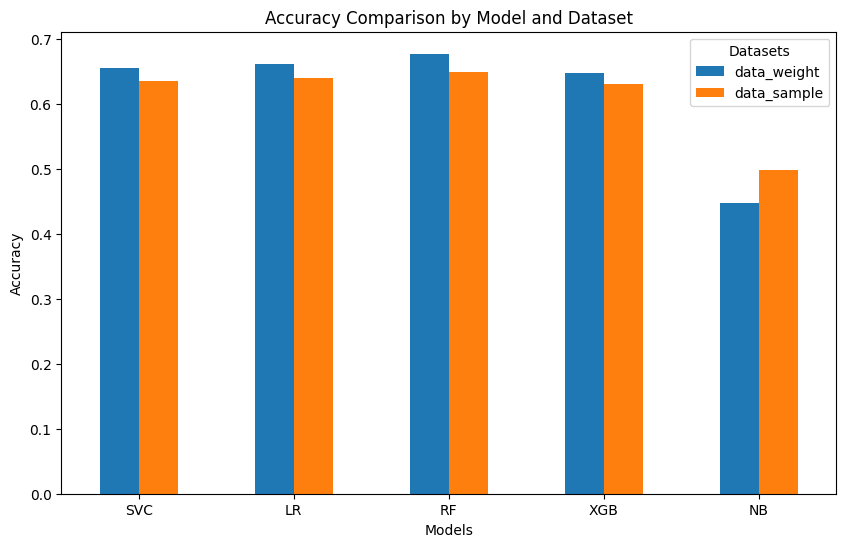

In [94]:
import matplotlib.pyplot as plt

# Transpose the DataFrame for easier plotting
df_acc_transposed = df_acc.transpose()
print(df_acc_transposed)

# Plot the bar chart
ax = df_acc_transposed.plot(kind='bar', rot=0, figsize=(10, 6))

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison by Model and Dataset')

# Add legend
plt.legend(title='Datasets')

# Show the plot
plt.show()

We observe than the data_weight df is better for the model training except on the Naive Bayes model, but we can ignore it since its accuracy is way lower than other models.
This poroves that its better to have less instances but with the height column than the opposite.
So we are going to use grid search on the data_weight since its a better df for training and since it has less instances, it is going to make the calculations way quicker (some grid search with 10k instances took more than 500minutes ...)

# Grid Search

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
# We use data_weight for the grid search so we put in the train test spllit again
X = data_weight.drop('readmitted', axis=1)
y = data_weight['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [100]:
# Grid Search SVC
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}

# Create the SVC model
svc_model = SVC()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(svc_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the testing data using the best model
svc_pred = grid_search.predict(X_test)

# Evaluate the model
SVC_w_gs_accuracy = accuracy_score(y_test, svc_pred)
print(f"Accuracy: {SVC_w_gs_accuracy:.2f}")

# Print additional evaluation metrics
#print("\nClassification Report:")
#print(classification_report(Y_test, SVC_pred))

Best Hyperparameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Accuracy: 0.66


In [101]:
# Grid Search LR
# Define the parameter grid
param_grid = {
    'penalty': ['l1','l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'],
    'max_iter': [50, 100, 200, 500]
}

# Create the SVC model
lr_model = LogisticRegression()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the testing data using the best model
lr_pred = grid_search.predict(X_test)

# Evaluate the model
LR_w_gs_accuracy = accuracy_score(y_test, lr_pred)
print(f"Accuracy: {LR_w_gs_accuracy:.2f}")

# Print additional evaluation metrics
#print("\nClassification Report:")
#print(classification_report(Y_test, SVC_pred))

c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

Best Hyperparameters: {'C': 0.1, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.67


c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
420 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ringi_3xz04z7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Use

In [102]:
print(f"Accuracy: {LR_w_gs_accuracy:.4f}")


Accuracy: 0.6722


In [103]:
# Grid Search RF
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


# Create the SVC model
rf_model = RandomForestClassifier(n_estimators = 450, max_depth=9, random_state=43)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the testing data using the best model
rf_pred = grid_search.predict(X_test)

# Evaluate the model
RF_w_gs_accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {RF_w_gs_accuracy:.2f}")

# Print additional evaluation metrics
#print("\nClassification Report:")
#print(classification_report(Y_test, SVC_pred))

Best Hyperparameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
Accuracy: 0.69


In [104]:
# Grid Search XGB
# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}


# Create the SVC model
xgb_model = xgboost.XGBClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the testing data using the best model
xgb_pred = grid_search.predict(X_test)

# Evaluate the model
XGB_w_gs_accuracy = accuracy_score(y_test, xgb_pred)
print(f"Accuracy: {XGB_w_gs_accuracy:.2f}")

# Print additional evaluation metrics
#print("\nClassification Report:")
#print(classification_report(Y_test, SVC_pred))

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.66


In [106]:

# Define the parameter grid (Note: GaussianNB has fewer hyperparameters)
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'priors': [None, [0.3, 0.7], [0.2, 0.8]],
}


# Instantiate the GridSearchCV object
grid_search = GridSearchCV(naive_bayes_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the testing data using the best model
nb_pred = grid_search.predict(X_test)

# Evaluate the model
NB_w_gs_accuracy = accuracy_score(y_test, nb_pred)
print(f"Accuracy: {NB_w_gs_accuracy:.2f}")

# Print additional evaluation metrics
#print("\nClassification Report:")
#print(classification_report(y_test, nb_pred))

Best Hyperparameters: {'priors': [0.2, 0.8], 'var_smoothing': 1e-05}
Accuracy: 0.47


In [108]:
df_acc.loc['grid_search']=[SVC_w_gs_accuracy,LR_w_gs_accuracy,RF_w_gs_accuracy,XGB_w_gs_accuracy,NB_w_gs_accuracy]
print(df_acc)


                  SVC        LR        RF       XGB        NB
data_weight  0.655684  0.660626    0.6771  0.647446  0.448105
data_sample    0.6355    0.6405    0.6485    0.6305    0.4975
grid_search  0.655684  0.672158  0.693575  0.660626  0.467875


    data_weight data_sample grid_search
SVC    0.655684      0.6355    0.655684
LR     0.660626      0.6405    0.672158
RF       0.6771      0.6485    0.693575
XGB    0.647446      0.6305    0.660626
NB     0.448105      0.4975    0.467875


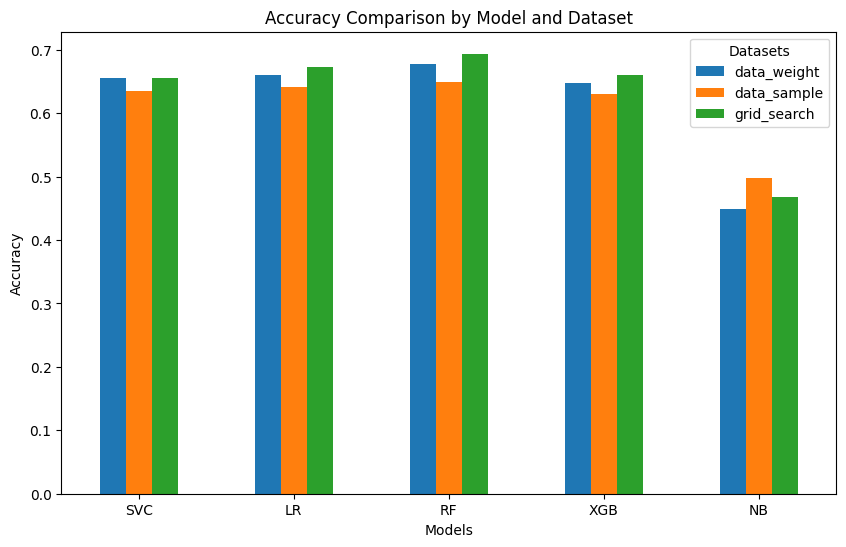

In [109]:
import matplotlib.pyplot as plt

# Transpose the DataFrame for easier plotting
df_acc_transposed = df_acc.transpose()
print(df_acc_transposed)
# Plot the bar chart
ax = df_acc_transposed.plot(kind='bar', rot=0, figsize=(10, 6))

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison by Model and Dataset')

# Add legend
plt.legend(title='Datasets')

# Show the plot
plt.show()

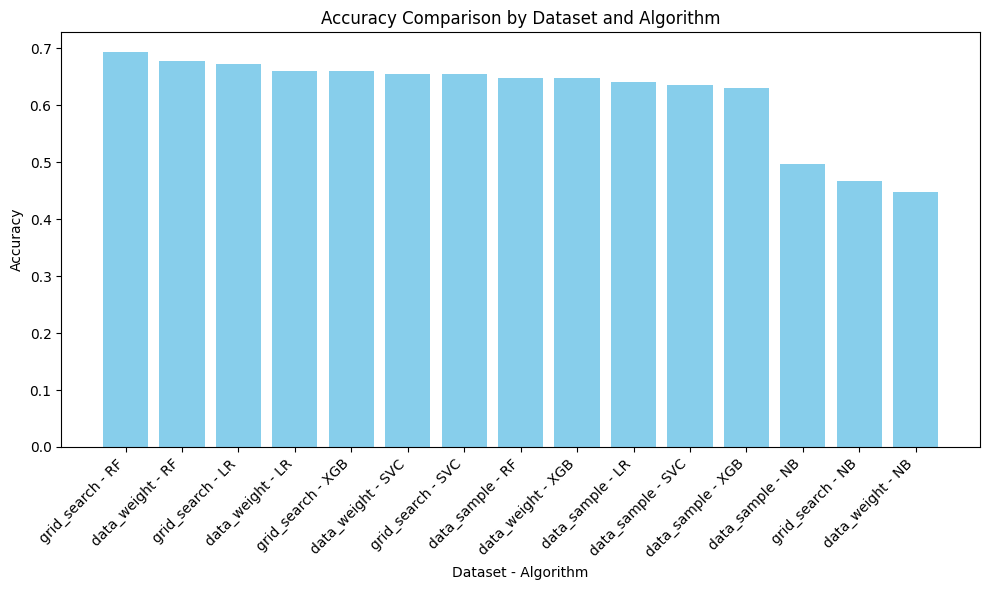

,Dataset,Algorithm,Accuracy,Dataset_Algorithm
12,grid_search,RF,0.693575,grid_search - RF
2,data_weight,RF,0.6771,data_weight - RF
11,grid_search,LR,0.672158,grid_search - LR
1,data_weight,LR,0.660626,data_weight - LR
13,grid_search,XGB,0.660626,grid_search - XGB
0,data_weight,SVC,0.655684,data_weight - SVC
10,grid_search,SVC,0.655684,grid_search - SVC
7,data_sample,RF,0.6485,data_sample - RF
3,data_weight,XGB,0.647446,data_weight - XGB
6,data_sample,LR,0.6405,data_sample - LR


In [110]:
df_stacked = df_acc.stack().reset_index()

# Rename the columns
df_stacked.columns = ['Dataset', 'Algorithm', 'Accuracy']
df_stacked['Dataset_Algorithm'] = df_stacked['Dataset'] + ' - ' + df_stacked['Algorithm']
df_stacked_sorted = df_stacked.sort_values(by='Accuracy', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_stacked_sorted['Dataset_Algorithm'], df_stacked_sorted['Accuracy'], color='skyblue')
plt.xlabel('Dataset - Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison by Dataset and Algorithm')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

df_stacked_sorted

We can see that the best model to predict the readmitted column is the the Random Forest Classifier with best Hyperparameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}. It has an accuracy of approximately 0,69, which is alright.